In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle


In [2]:
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.shape

(545, 13)

In [4]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [6]:
numeric_cols=df.select_dtypes(include=np.number).columns.tolist()
categorical_cols=df.select_dtypes(include='object').columns.tolist()
print("numeric_cols=",numeric_cols)
print("categorical_cols=",categorical_cols)


numeric_cols= ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_cols= ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [7]:
binary_map = {'yes': 1, 'no': 0}
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']:
    df[col] = df[col].map(binary_map)




In [8]:
df_dummies = pd.get_dummies(df['furnishingstatus'], prefix='status')

# Merge back to original DataFrame
df = pd.concat([df, df_dummies], axis=1)
binary_map = {True: 1, False: 0}
for col in ['status_furnished', 'status_semi-furnished', 'status_unfurnished']:
    df[col] = df[col].map(binary_map)

df.drop(columns=['furnishingstatus'],inplace=True)

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,status_furnished,status_semi-furnished,status_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [9]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'status_furnished', 'status_semi-furnished',
       'status_unfurnished'],
      dtype='object')

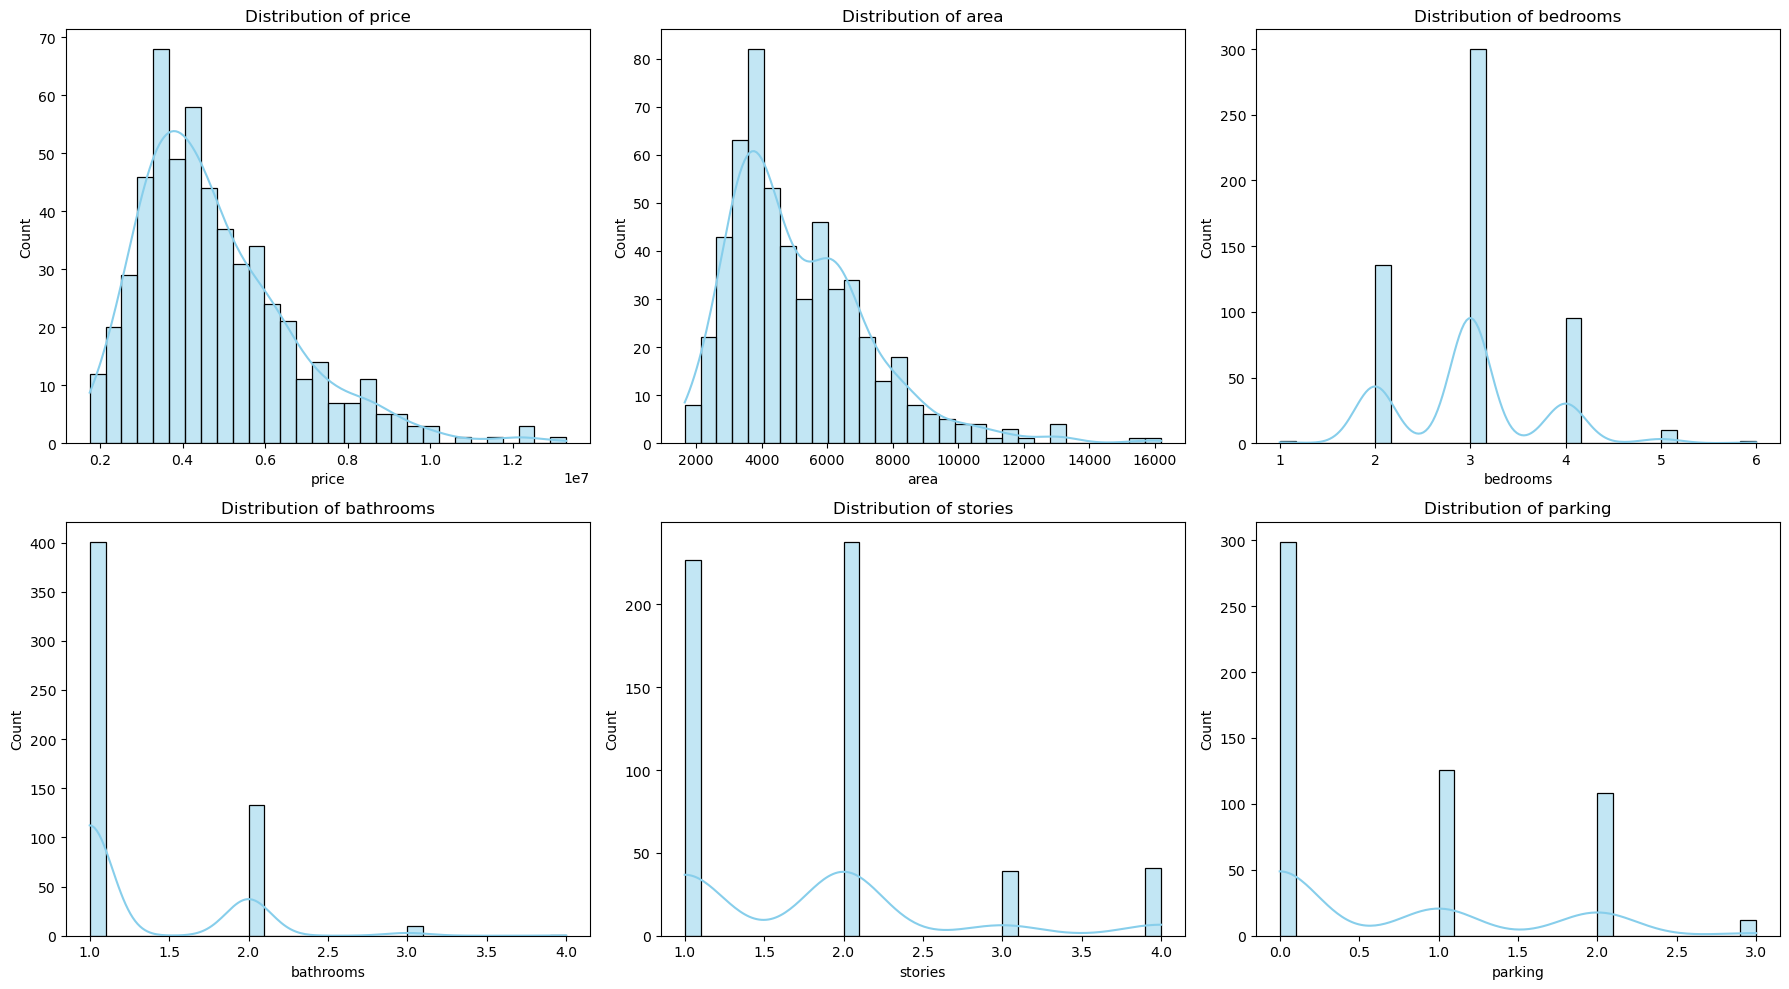

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

plt.figure(figsize=(18, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


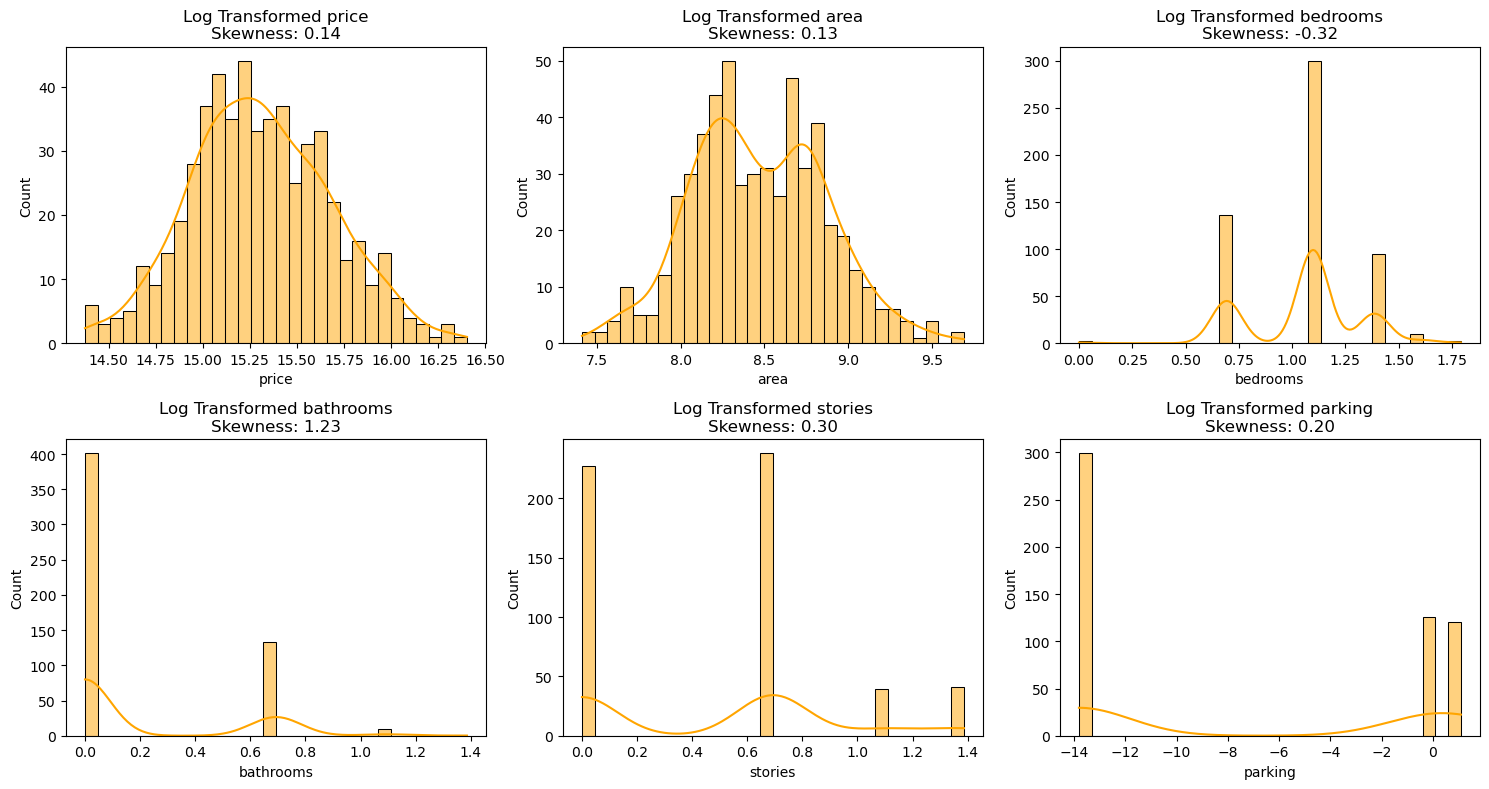

price                    0.140863
area                     0.133520
bedrooms                -0.320457
bathrooms                1.228648
stories                  0.298967
mainroad                -2.065410
guestroom                1.688419
basement                 0.628590
hotwaterheating          4.353428
airconditioning          0.795748
parking                  0.199857
prefarea                 1.254361
status_furnished         1.115969
status_semi-furnished    0.339635
status_unfurnished       0.741509
dtype: float64

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Copy dataframe to avoid modifying original
df_log = df.copy()
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Apply log transformation with a small constant to avoid log(0)
for col in numeric_cols:
    df_log[col] = np.log(df_log[col] + 1e-6)

# Plot only log-transformed distributions with skewness
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_log[col], kde=True, color='orange', bins=30)
    plt.title(f'Log Transformed {col}\nSkewness: {skew(df_log[col]):.2f}')

plt.tight_layout()
plt.show()
df_log.skew()


In [12]:
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns

# Shift data by 1 to account for zeros if any
bathrooms_sqrt = np.sqrt(df['bathrooms'] + 1)

# Calculate skewness after transformation
skewness_after = skew(bathrooms_sqrt)

print(f"Skewness after Square Root transform: {skewness_after:.4f}")

Skewness after Square Root transform: 1.4196


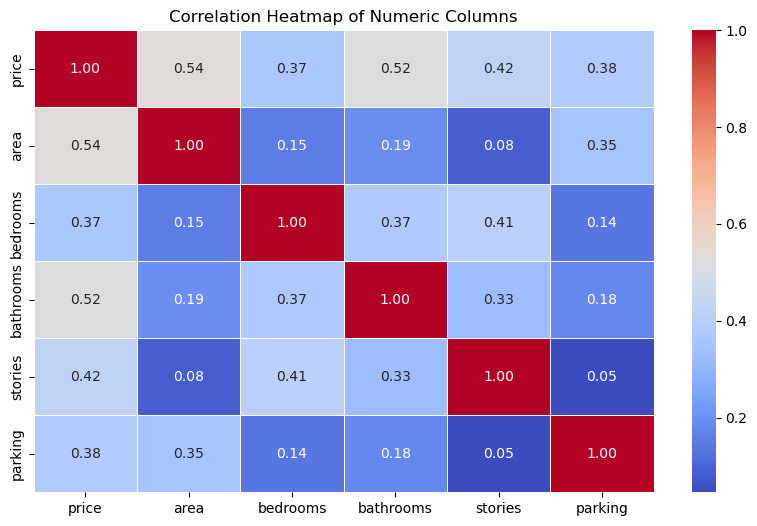

In [13]:
corr = df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


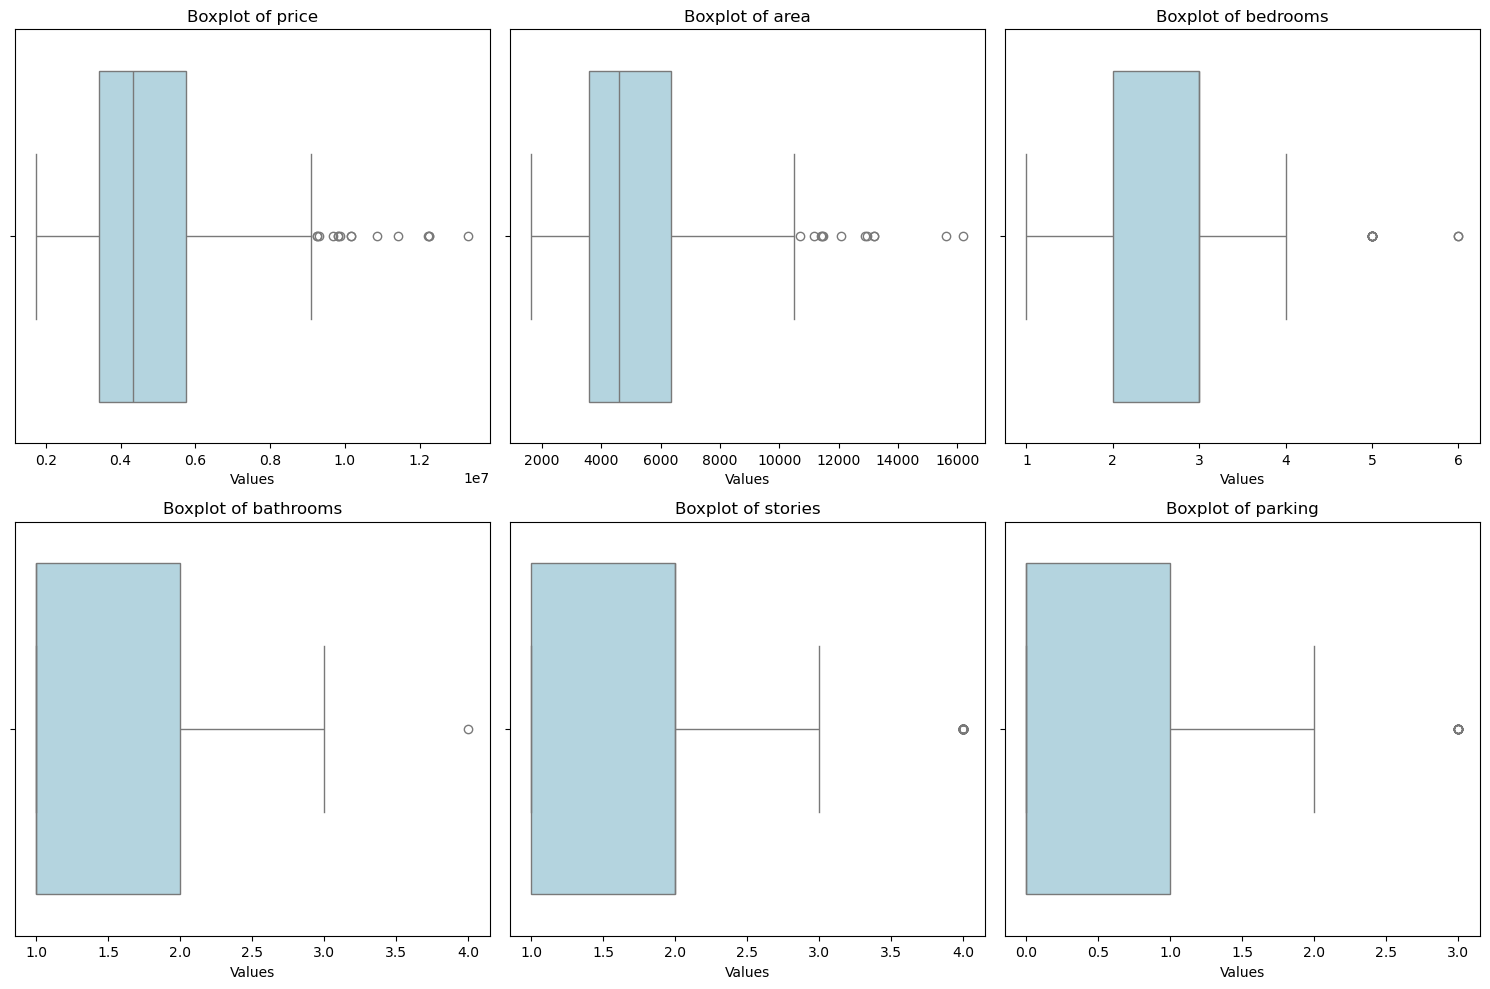

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('Values')

plt.tight_layout()
plt.show()


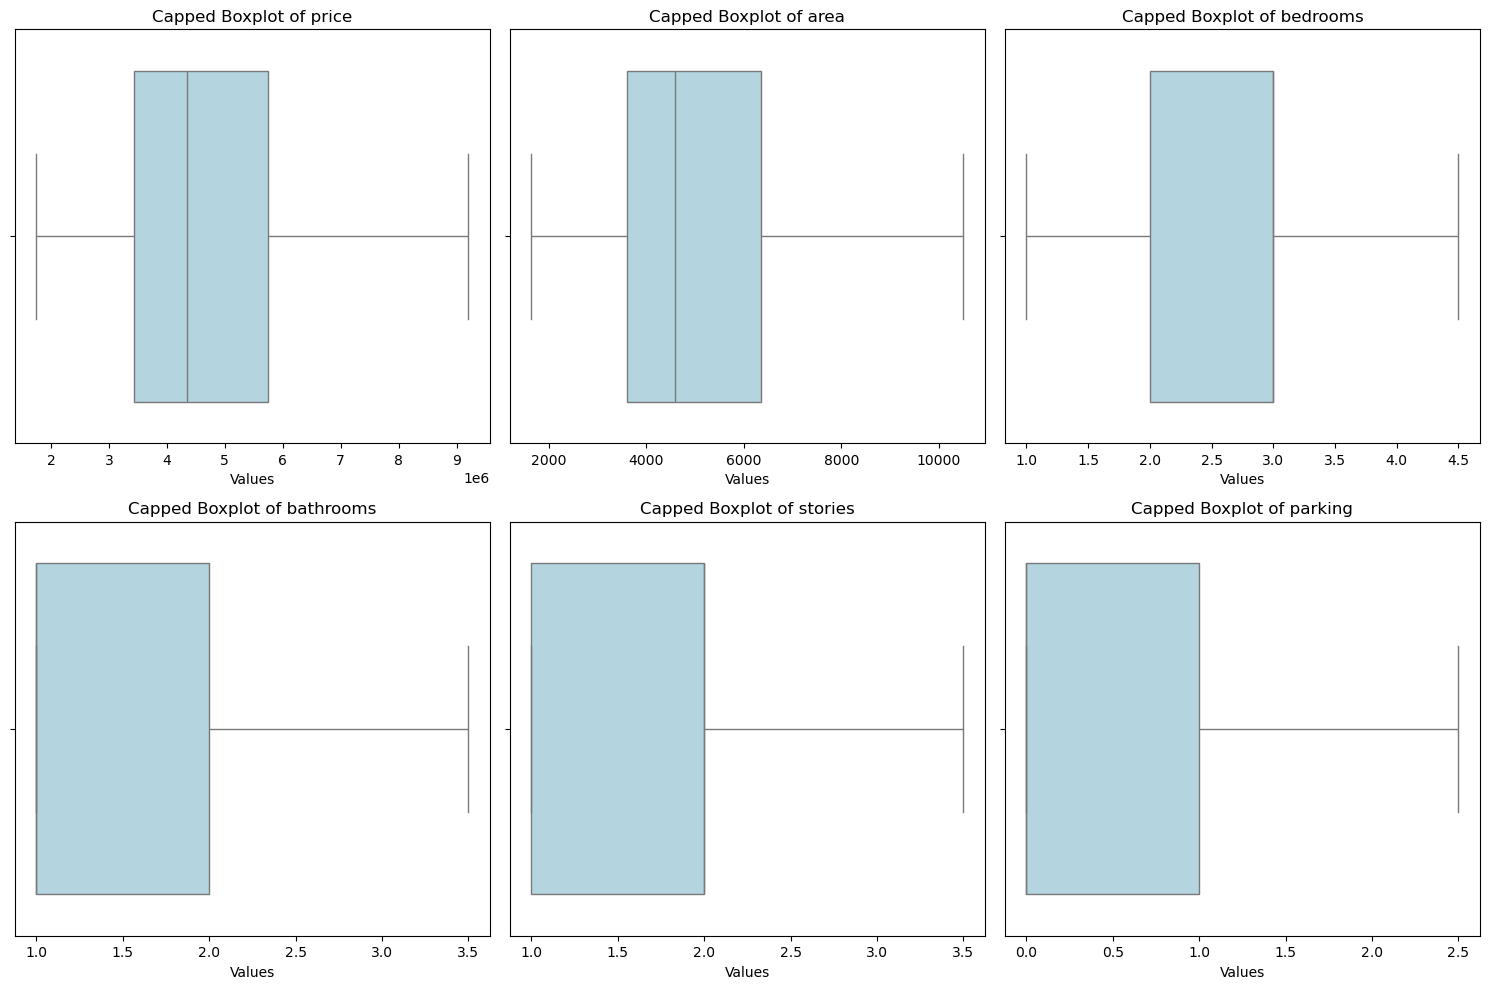

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Cap outliers using IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Plot capped boxplots
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Capped Boxplot of {col}')
    plt.xlabel('Values')

plt.tight_layout()
plt.show()



In [16]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = -cross_val_score(knn, X_train_scaled, y_train, cv=kf, scoring='neg_root_mean_squared_error')
print(f'5-Fold CV RMSE: {cv_scores.mean():.2f}')

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)
print(f'Test RMSE: {test_rmse:.2f}')
print(f'Test R²: {test_r2:.2f}')


5-Fold CV RMSE: 1029443.44
Test RMSE: 1175384.24
Test R²: 0.66


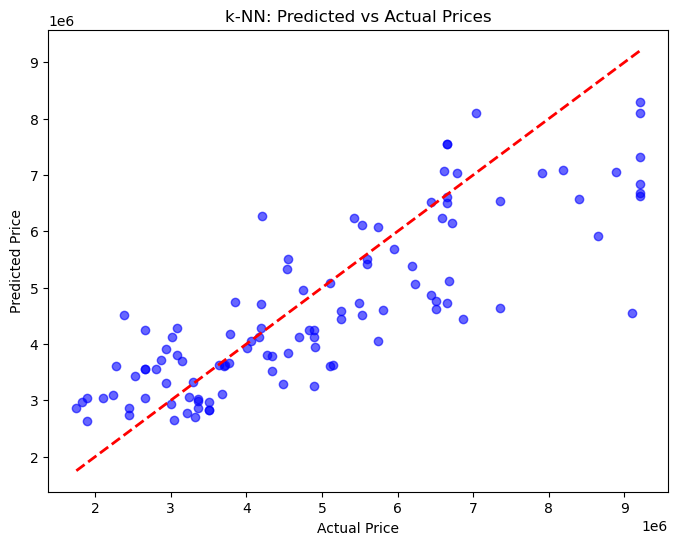

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('k-NN: Predicted vs Actual Prices')
plt.show()

In [18]:
import pickle


with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)


with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model and scaler saved successfully.")


Model and scaler saved successfully.
